# Introduction

RFM analysis is a marketing technique used to quantitatively rank and group customers based on the recency, frequency and monetary total of their recent transactions to identify the best customers and perform targeted marketing campaigns.

The  idea is to segment customers based on when their last purchase was, how often they’ve purchased in the past, and how much they’ve spent overall. All three of these measures have proven to be effective predictors of a customer's willingness to engage in marketing messages and offers.

While RFM analysis was born in direct-mail, it is a powerful tool for eCommerce stores to use today. 

Conducting an RFM analysis on our customer base and sending personalized campaigns to high value targets has massive benefits for our eCommerce store.

- Personalization:  By creating effective customer segments, you can create relevant, personalized offers.
- Improve Conversion Rates: Personalized offers will yield higher conversion rates because our customers are engaging with products they care about. 
- Improve unit economics
- Increase revenue and profits

Therefore, this project will using RFM analysis to online retail dataset in Kaggle (https://www.kaggle.com/datasets/tunguz/online-retail)

# Download Dataset

This dataset is a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.

In [65]:
%pip install opendatasets
import opendatasets as od

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [66]:
od.download("https://www.kaggle.com/datasets/tunguz/online-retail")

Skipping, found downloaded files in "./online-retail" (use force=True to force download)


# Import Library

In [67]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
import scipy as shc
from scipy.cluster.hierarchy import dendrogram, linkage


from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

from imblearn.over_sampling import SMOTE

# Read Dataset


In [68]:
df = pd.read_csv("online-retail/Online_Retail.csv", encoding='windows-1254')
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/11 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/11 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/11 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/11 12:50,4.15,12680.0,France


In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


# Preprocessing

### Atribut Categorical

In [70]:
cat_cols = list(df.select_dtypes('object'))
cat_cols

['InvoiceNo', 'StockCode', 'Description', 'InvoiceDate', 'Country']

### Atribut Numerical

In [71]:
num_cols = list(df.select_dtypes(['int64','float64']))
num_cols

['Quantity', 'UnitPrice', 'CustomerID']

In [72]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


## Drop Null & Duplicate

In [73]:
df.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [74]:
df.dropna(inplace=True)
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/11 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/11 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/11 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/11 12:50,4.15,12680.0,France


In [75]:
df.drop_duplicates(inplace=True)
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/11 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/11 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/11 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/11 12:50,4.15,12680.0,France


In [76]:
df.isna().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [77]:
df.shape

(401604, 8)

## Check Unique Value
Mengecek unique values pada masing-masing kolom

In [78]:
for col in cat_cols:
    unique = df[col].value_counts()
    print("Column: " + col)
    print(unique)
    print('==============\n')

Column: InvoiceNo
576339     542
579196     533
580727     529
578270     442
573576     435
          ... 
C560912      1
560913       1
560917       1
572879       1
553049       1
Name: InvoiceNo, Length: 22190, dtype: int64

Column: StockCode
85123A    2065
22423     1894
85099B    1659
47566     1409
84879     1405
          ... 
90104        1
90135        1
90027D       1
90027A       1
84746        1
Name: StockCode, Length: 3684, dtype: int64

Column: Description
WHITE HANGING HEART T-LIGHT HOLDER    2058
REGENCY CAKESTAND 3 TIER              1894
JUMBO BAG RED RETROSPOT               1659
PARTY BUNTING                         1409
ASSORTED COLOUR BIRD ORNAMENT         1405
                                      ... 
PINK/WHITE GLASS DEMI CHOKER             1
 I LOVE LONDON MINI RUCKSACK             1
SET 36 COLOURING PENCILS DOILEY          1
SET 12 COLOURING PENCILS DOILEY          1
PEARL AND CHERRY QUARTZ BRACLET          1
Name: Description, Length: 3896, dtype: int64

Col

In [79]:
for col in num_cols:
    unique = df[col].value_counts()
    print("Column: " + col)
    print(unique)
    print('==============\n')

Column: Quantity
 1        69605
 12       59828
 2        57425
 6        37480
 4        32093
          ...  
 828          1
 560          1
-408          1
 512          1
-80995        1
Name: Quantity, Length: 436, dtype: int64

Column: UnitPrice
1.25      45813
1.65      36955
2.95      26796
0.85      26085
0.42      21777
          ...  
3.56          1
4.37          1
6.89          1
0.98          1
224.69        1
Name: UnitPrice, Length: 620, dtype: int64

Column: CustomerID
17841.0    7812
14911.0    5898
14096.0    5128
12748.0    4459
14606.0    2759
           ... 
18068.0       1
13256.0       1
15590.0       1
16138.0       1
15389.0       1
Name: CustomerID, Length: 4372, dtype: int64



# Detect Outliers Using Z Score

In [80]:
def detect_outlier(data):
    outliers = []
    
    threshold = 3
    mean = np.mean(data)
    std = np.std(data)
    
    
    for y in data:
        z_score= (y - mean)/std 
        if np.abs(z_score) > threshold:
            outliers.append(y)
    return outliers

In [81]:
for item in num_cols:
  if(item != 'CustomerID'):
    mean = np.mean(df[f'{item}'])
    print(f'Outliers {item} : {mean}')
    outliers = detect_outlier(df[f'{item}'])
    df[f'{item}'].replace(outliers, mean, inplace=True)
    print(outliers)

Outliers Quantity : 12.183272576966365
[-9360, 1824, 2880, 1400, 1440, 972, 972, 1008, 1008, 1000, 1488, 1394, 1728, 2400, 960, 1296, 860, 1010, 1356, 1284, 1930, 2000, 3114, 1300, 74215, -74215, 1440, 900, 2592, 800, 1200, 864, 1296, 1296, 1296, 2400, 1056, 1500, 2400, 3906, 1152, 1200, 1152, 864, 864, 768, 900, 800, 1200, 1296, 2160, 1000, 1440, 864, 1200, 1152, 864, 1152, 864, 1200, 1056, 1728, -1300, -1930, -2000, -3114, 1930, 1300, 2000, 3114, 960, 960, 960, 960, 1008, 1200, 1200, 1152, 2000, -960, 1350, 1200, -1350, 864, 2700, 906, 888, 888, 960, 4300, 1152, 1600, 1200, 1515, -1515, 864, 828, 768, 768, 1200, 864, 1440, 3186, 900, 960, 1440, 1440, 1000, 1008, 1900, 2880, 968, 824, -828, 1200, 2000, 1000, 1440, 1152, 840, 960, 1000, 864, 1788, 1878, 1944, 1944, 1428, 852, 1412, -756, 1200, 1000, 1200, 960, 1540, -1200, 1000, 1296, 840, 1296, -840, -1296, 1296, 840, 1728, 1200, 960, 960, 2400, 4800, 912, 1992, 3000, 864, 832, 992, 1020, 2100, 1200, 1200, 1000, 960, 864, 1000, 1600, 

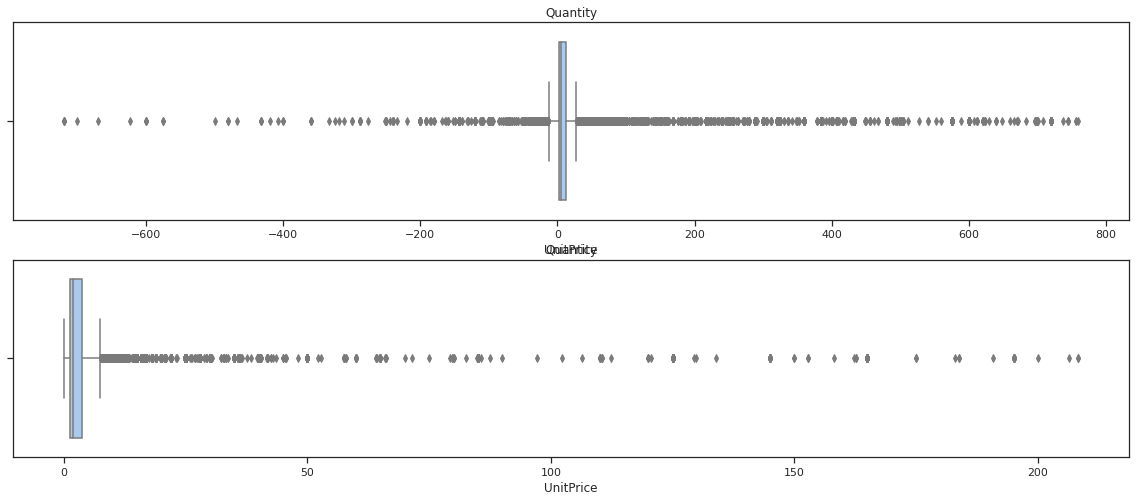

In [82]:
fig, ax = plt.subplots(ncols=1, nrows=2, figsize=(20, 8))

i=0
for col in num_cols[:-1]:
    sns.boxplot(data=df, x=col, ax=ax[i], palette='pastel')
    ax[i].set_title(col, fontsize=12)
    i=i+1

# RFM

## Feature Creation

In [83]:
df['Amount'] = df['Quantity'] * df['UnitPrice']
monetary = df.groupby('CustomerID')['Amount'].sum()
monetary = monetary.reset_index()
monetary

,CustomerID,Amount
0,12346.0,25.341207
1,12347.0,4310.000000
2,12348.0,1797.240000
3,12349.0,1461.024064
4,12350.0,334.400000
...,...,...
4367,18280.0,180.600000
4368,18281.0,80.820000
4369,18282.0,176.600000
4370,18283.0,2045.530000


In [84]:
frequency = df.groupby('CustomerID')['InvoiceNo'].count()
frequency = frequency.reset_index()
frequency

,CustomerID,InvoiceNo
0,12346.0,2
1,12347.0,182
2,12348.0,31
3,12349.0,73
4,12350.0,17
...,...,...
4367,18280.0,10
4368,18281.0,7
4369,18282.0,13
4370,18283.0,721


In [85]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['Diff'] = max(df['InvoiceDate']) - df['InvoiceDate']
recency = df.groupby('CustomerID')['Diff'].min()
recency = recency.dt.days
recency = recency.reset_index()
recency

,CustomerID,Diff
0,12346.0,325
1,12347.0,1
2,12348.0,74
3,12349.0,18
4,12350.0,309
...,...,...
4367,18280.0,277
4368,18281.0,180
4369,18282.0,7
4370,18283.0,3


In [86]:
rfm = pd.merge(recency, frequency, on='CustomerID')

In [87]:
rfm = pd.merge(rfm, monetary, on='CustomerID')

In [88]:
rfm.columns = ['CustomerID', 'Recency', 'Frequency', 'Monetary']
rfm

,CustomerID,Recency,Frequency,Monetary
0,12346.0,325,2,25.341207
1,12347.0,1,182,4310.000000
2,12348.0,74,31,1797.240000
3,12349.0,18,73,1461.024064
4,12350.0,309,17,334.400000
...,...,...,...,...
4367,18280.0,277,10,180.600000
4368,18281.0,180,7,80.820000
4369,18282.0,7,13,176.600000
4370,18283.0,3,721,2045.530000


## Scaling

Standardization scales each input variable separately by subtracting the mean (called centering) and dividing by the standard deviation to shift the distribution to have a mean of zero and a standard deviation of one.
The standard score of a sample x is calculated as:

z = (x — u) / s
 

In [89]:
from sklearn.preprocessing import StandardScaler

In [90]:
rfm_scaled = rfm[['Recency', 'Frequency', 'Monetary']]
rfm_scaled

,Recency,Frequency,Monetary
0,325,2,25.341207
1,1,182,4310.000000
2,74,31,1797.240000
3,18,73,1461.024064
4,309,17,334.400000
...,...,...,...
4367,277,10,180.600000
4368,180,7,80.820000
4369,7,13,176.600000
4370,3,721,2045.530000


Peek of the data after applying normalizing techniques.

In [91]:
rfm_scaled = StandardScaler().fit_transform(rfm_scaled)
rfm_scaled = pd.DataFrame(rfm_scaled)
rfm_scaled.columns = ['Recency', 'Frequency', 'Monetary']
rfm_scaled

,Recency,Frequency,Monetary
0,2.322023,-0.392056,-0.232697
1,-0.893733,0.393293,0.312520
2,-0.169196,-0.265527,-0.007225
3,-0.725005,-0.082279,-0.050008
4,2.163220,-0.326610,-0.193370
...,...,...,...
4367,1.845615,-0.357152,-0.212940
4368,0.882873,-0.370241,-0.225637
4369,-0.834182,-0.344062,-0.213449
4370,-0.873883,2.744979,0.024369


## Clustering

In [92]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

### Elbow Curve

A fundamental step for any unsupervised algorithm is to determine the optimal number of clusters into which the data may be clustered. The Elbow Method is one of the most popular methods to determine this optimal value of k.

In [93]:
distortions = []
range_n_clusters = range(1, 10)
for num_cluster in range_n_clusters :
  kmeans = KMeans(n_clusters=num_cluster)
  kmeans.fit(rfm_scaled)

  distortions.append(kmeans.inertia_)

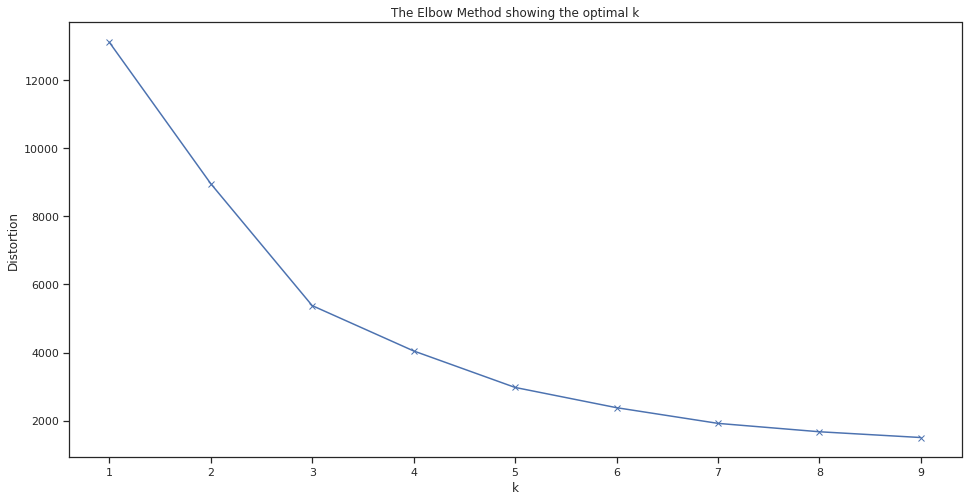

In [94]:
plt.figure(figsize=(16,8))
plt.plot(range_n_clusters, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

## Fitting

In [95]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(rfm_scaled)

KMeans(n_clusters=3)

In [96]:
result_df = rfm_scaled
result_df['Cluster'] = kmeans.labels_
result_df

,Recency,Frequency,Monetary,Cluster
0,2.322023,-0.392056,-0.232697,1
1,-0.893733,0.393293,0.312520,0
2,-0.169196,-0.265527,-0.007225,0
3,-0.725005,-0.082279,-0.050008,0
4,2.163220,-0.326610,-0.193370,1
...,...,...,...,...
4367,1.845615,-0.357152,-0.212940,1
4368,0.882873,-0.370241,-0.225637,1
4369,-0.834182,-0.344062,-0.213449,0
4370,-0.873883,2.744979,0.024369,0


## Result

<Figure size 1440x1080 with 0 Axes>

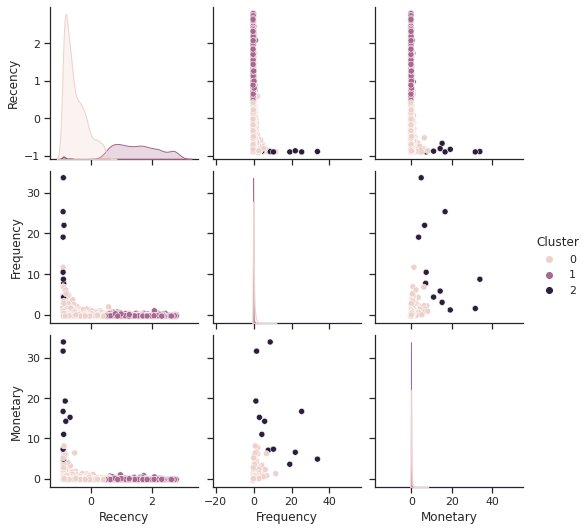

In [97]:
plt.figure(figsize=(20, 15))
sns.pairplot(result_df[['Recency', 'Frequency', 'Monetary', 'Cluster']], hue='Cluster')
plt.show()

In [98]:
summary_df = result_df[['Recency', 'Frequency', 'Monetary', 'Cluster']].groupby('Cluster').mean()
summary_df

,Recency,Frequency,Monetary
Cluster,,,
0,-0.514013,0.051045,0.007939
1,1.540243,-0.282044,-0.179823
2,-0.863958,11.875756,14.264280


In [99]:
result_df["Cluster"].value_counts()

0    3264
1    1096
2      12
Name: Cluster, dtype: int64

In [100]:
summary_df['Total'] = result_df["Cluster"].value_counts()
summary_df

,Recency,Frequency,Monetary,Total
Cluster,,,,
0,-0.514013,0.051045,0.007939,3264
1,1.540243,-0.282044,-0.179823,1096
2,-0.863958,11.875756,14.264280,12


In [115]:
def draw_plot(column_x, column_y, size=(8, 8)):
  plt.figure(figsize=size)
  sns.scatterplot(x=column_x, y=column_y, hue=result_df['Cluster'])
  plt.show()

In [116]:
def draw_boxplot(column, size=(8, 8)):
  plt.figure(figsize=size)
  sns.boxplot(x='Cluster', y=f'{column}', data=result_df)
  plt.show()

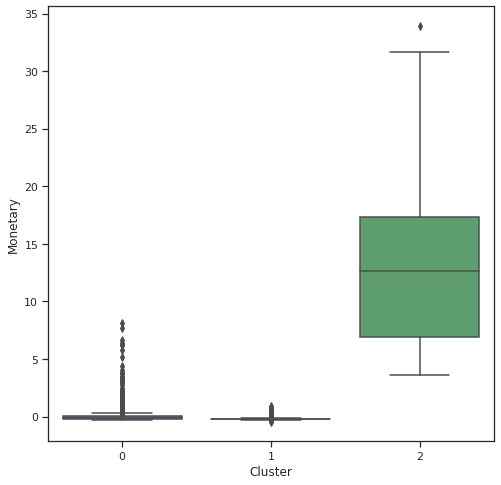

In [117]:
draw_boxplot('Monetary')

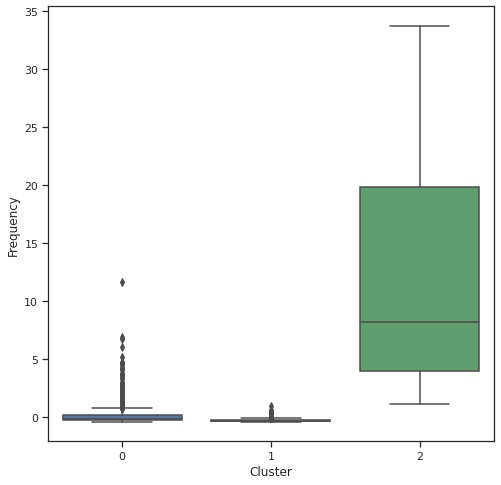

In [118]:
draw_boxplot('Frequency')

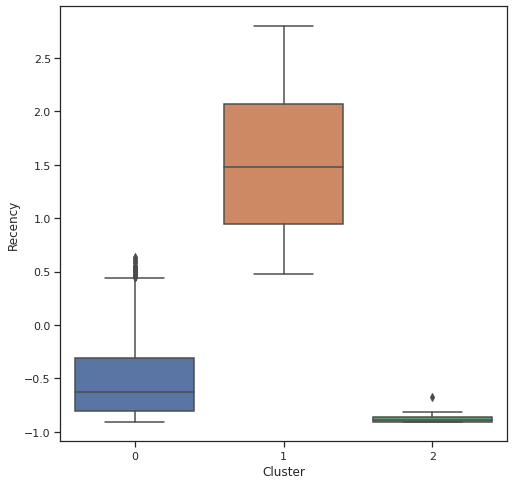

In [119]:
draw_boxplot('Recency')

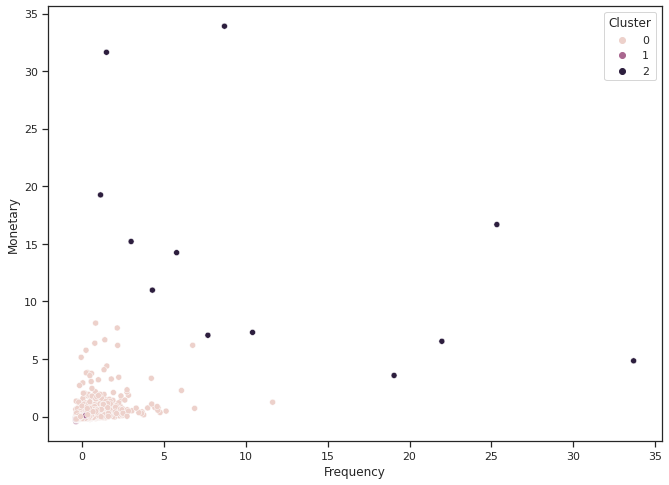

In [106]:
draw_plot(result_df['Frequency'], result_df['Monetary'])

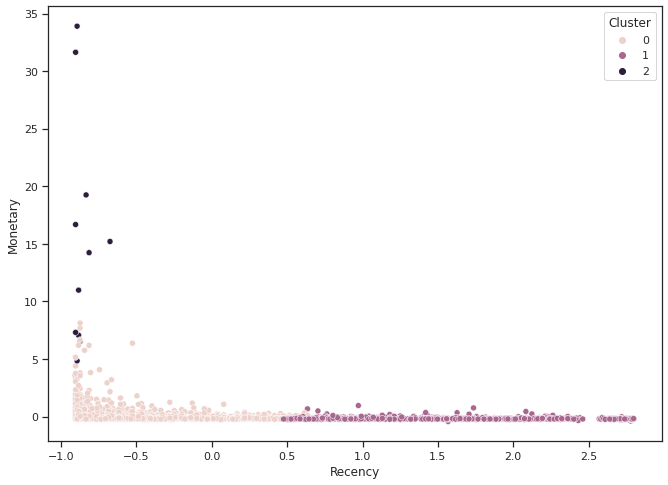

In [107]:
draw_plot(result_df['Recency'], result_df['Monetary'])

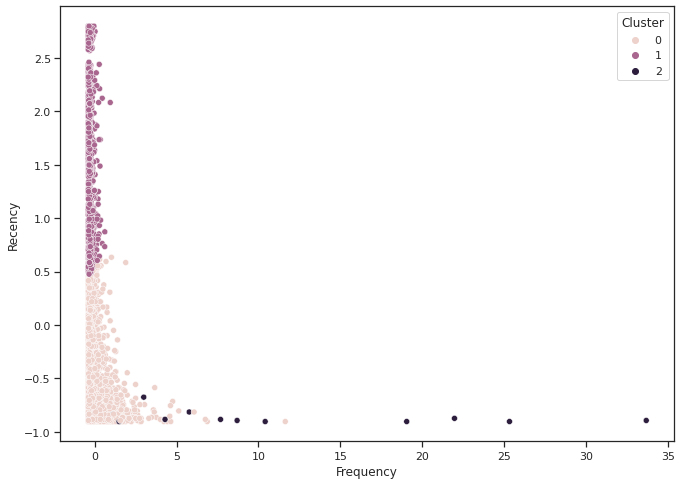

In [108]:
draw_plot(result_df['Frequency'], result_df['Recency'])

In [109]:
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt

In [110]:
result_df['Cluster'].value_counts()

0    3264
1    1096
2      12
Name: Cluster, dtype: int64

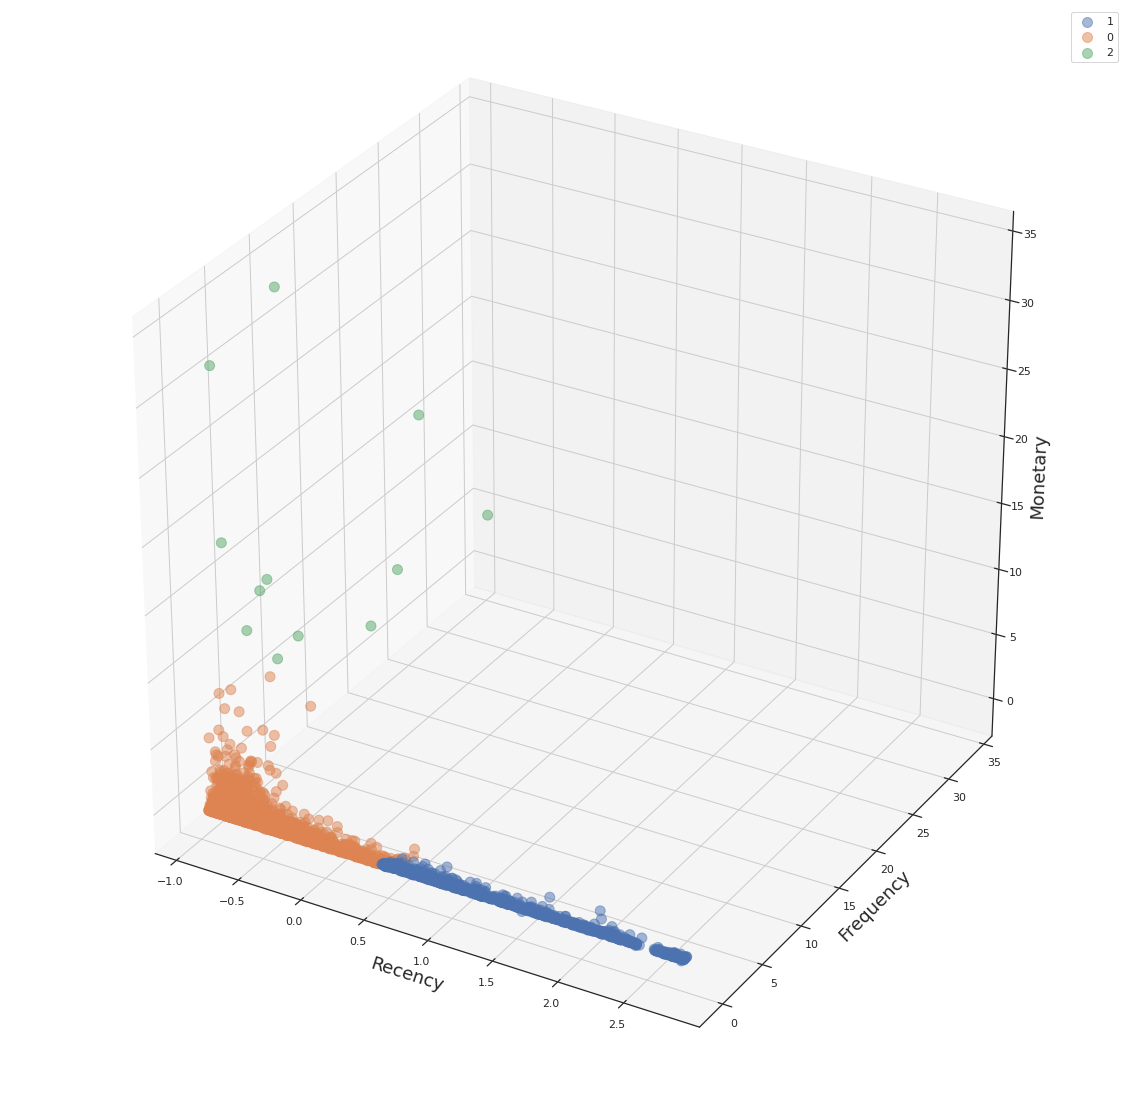

In [114]:
fig = plt.figure(figsize=(20, 20))
ax = plt.axes(projection='3d')
for cluster in result_df['Cluster'].unique() :
  result_cluster = result_df.loc[result_df['Cluster'] == cluster]
  ax.scatter(result_cluster['Recency'], result_cluster['Frequency'], result_cluster['Monetary'], label=cluster ,s=100, alpha=0.5, cmap='winter')

ax.set_xlabel('Recency', fontsize=18)
ax.set_ylabel('Frequency', fontsize=18)
ax.set_zlabel('Monetary', fontsize=18)
ax.legend()
plt.show()

# Data Analysis
We can make extensive analysis on this customer segmentation based on the above-given chart. 
- 0 [Requires Activation / Rookies - Your Newest Customers]:
  
  **Marketing Strategies:**  Loyalty programs are effective for these repeat visitors. For the new customers, most customers never graduate to loyal. Having clear strategies in place for first time buyers such as triggered welcome emails will pay dividends.
- 1 [Slipping - Once Loyal, Now Gone]: Great past customers who haven't bought in awhile.
  
  **Marketing Strategies:** Customers leave for a variety of reasons. Depending on your situation price deals, new product launches, or other retention strategies.
- 2 [Whales - Your Most Loyal and Highest Paying Customers]:
  
  **Marketing Strategies:** These customers have demonstrated a high willingness to pay. Consider premium offers, subscription tiers, luxury products, or value add cross/up-sells to increase AOV. Don't waste margin on discounts. 

In [112]:
result_df['CustomerID'] = rfm['CustomerID']
result_df.sort_values(by=['CustomerID'])

,Recency,Frequency,Monetary,Cluster,CustomerID
0,2.322023,-0.392056,-0.232697,1,12346.0
1,-0.893733,0.393293,0.312520,0,12347.0
2,-0.169196,-0.265527,-0.007225,0,12348.0
3,-0.725005,-0.082279,-0.050008,0,12349.0
4,2.163220,-0.326610,-0.193370,1,12350.0
...,...,...,...,...,...
4367,1.845615,-0.357152,-0.212940,1,18280.0
4368,0.882873,-0.370241,-0.225637,1,18281.0
4369,-0.834182,-0.344062,-0.213449,0,18282.0
4370,-0.873883,2.744979,0.024369,0,18283.0


# Conclusion
The same project using RFM analysis can be extended and can be implemented into real-time data, which will be very helpful for the markets, commerce companies. Due to time limitations and also data, I could do the basic segmentation.

### References
- https://www.barilliance.com/rfm-analysis/
- https://medium.com/@hanindhiya.ika/customer-segmentation-using-rfm-analysis-5ba78e9f8546
- https://www.geeksforgeeks.org/elbow-method-for-optimal-value-of-k-in-kmeans/
- https://medium.com/web-mining-is688-spring-2021/exploring-customers-segmentation-with-rfm-analysis-and-k-means-clustering-118f9ffcd9f0
- https://algorit.ma/blog/rfm-analysis-2022/